In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Plot installed capacity

In [108]:
df_p = pd.read_csv('windpower_task0.csv', index_col=0, parse_dates=True)

In [109]:
df_p.head()

,SE1,SE2,SE3,SE4
2000-01-01 00:00:00+00:00,248.367512,466.054477,764.836097,437.724342
2000-01-01 01:00:00+00:00,238.104265,449.537397,656.174814,427.607047
2000-01-01 02:00:00+00:00,228.781771,497.112675,588.884484,386.638395
2000-01-01 03:00:00+00:00,218.608491,588.583537,536.230328,365.970470
2000-01-01 04:00:00+00:00,187.179221,639.385540,477.091549,360.579635


In [110]:
df_wt = pd.read_csv('windturbines.csv', index_col=0)

In [111]:
df_wt.head()

,Wind turbine ID,Terrain height [m],Nacelle height [m],Rotor diameter [m],Max power [MW],Price region,Installation date,Longitude,Latitude
0,1781-V-010-001,65.12,30.0,14.0,0.02,SE3,1881-12-31,14.133793,59.253088
1,1785-V-006-001,59.07,16.0,11.0,0.01,SE3,1881-12-31,12.802235,59.380151
2,1880-V-020-001,45.05,16.0,NaN,0.02,SE3,1881-12-31,15.075022,59.178468
3,2321-V-002-001,413.00,NaN,NaN,0.02,SE2,1881-12-31,13.376852,63.437566
4,2321-V-001-001,413.58,NaN,NaN,0.10,SE2,1881-12-31,13.376548,63.436982


In [112]:
df_wt['Capacity'] = df_wt['Max power [MW]'].cumsum()
df_wt['Capacity_SE1'] = df_wt[df_wt['Price region'] == 'SE1']['Max power [MW]'].cumsum()
df_wt['Capacity_SE2'] = df_wt[df_wt['Price region'] == 'SE2']['Max power [MW]'].cumsum()
df_wt['Capacity_SE3'] = df_wt[df_wt['Price region'] == 'SE3']['Max power [MW]'].cumsum()
df_wt['Capacity_SE4'] = df_wt[df_wt['Price region'] == 'SE4']['Max power [MW]'].cumsum()

In [113]:
df_wt['Capacity_SE1'] = df_wt['Capacity_SE1'].fillna(method='ffill')
df_wt['Capacity_SE2'] = df_wt['Capacity_SE2'].fillna(method='ffill')
df_wt['Capacity_SE3'] = df_wt['Capacity_SE3'].fillna(method='ffill')
df_wt['Capacity_SE4'] = df_wt['Capacity_SE4'].fillna(method='ffill')

In [114]:
df_wt.index = pd.to_datetime(df_wt['Installation date'])

In [115]:
df_wt

,Wind turbine ID,Terrain height [m],Nacelle height [m],Rotor diameter [m],Max power [MW],Price region,Installation date,Longitude,Latitude,Capacity,Capacity_SE1,Capacity_SE2,Capacity_SE3,Capacity_SE4
Installation date,,,,,,,,,,,,,,
1881-12-31,1781-V-010-001,65.12,30.0,14.0,0.02,SE3,1881-12-31,14.133793,59.253088,0.02,NaN,NaN,0.02,NaN
1881-12-31,1785-V-006-001,59.07,16.0,11.0,0.01,SE3,1881-12-31,12.802235,59.380151,0.03,NaN,NaN,0.03,NaN
1881-12-31,1880-V-020-001,45.05,16.0,NaN,0.02,SE3,1881-12-31,15.075022,59.178468,0.05,NaN,NaN,0.05,NaN
1881-12-31,2321-V-002-001,413.00,NaN,NaN,0.02,SE2,1881-12-31,13.376852,63.437566,0.07,NaN,0.02,0.05,NaN
1881-12-31,2321-V-001-001,413.58,NaN,NaN,0.10,SE2,1881-12-31,13.376548,63.436982,0.17,NaN,0.12,0.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-15,2482-V-021-001,425.73,152.0,136.0,4.20,SE1,2001-12-15,19.924253,65.212280,8623.64,1317.84,3005.73,2664.45,1635.62
2001-12-15,2482-V-021-004,400.85,152.0,136.0,4.20,SE1,2001-12-15,19.939618,65.205126,8627.84,1322.04,3005.73,2664.45,1635.62
2001-12-15,2482-V-021-003,402.64,152.0,136.0,4.20,SE1,2001-12-15,19.926770,65.203975,8632.04,1326.24,3005.73,2664.45,1635.62


In [116]:
df_wt = df_wt[df_p.index[0]:df_p.index[-1]]

/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/anaconda3/envs/gbdt-forecast/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was d

<AxesSubplot:xlabel='Installation date'>

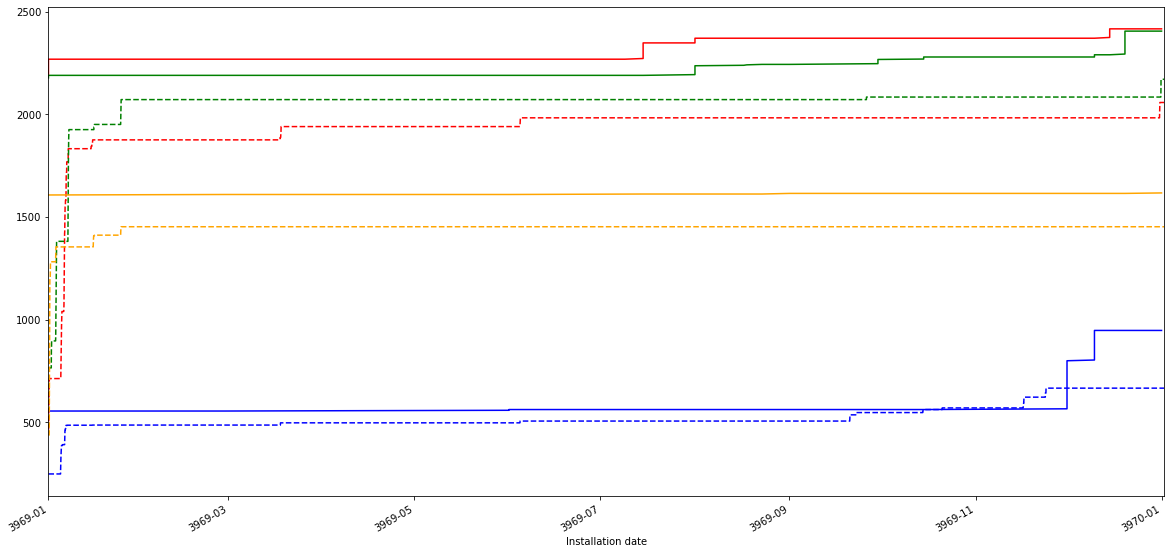

In [117]:
ax = df_wt['Capacity_SE1'].plot(figsize=(20,10), color='blue')
df_p.cummax()['SE1'].plot(color='blue', linestyle='--', ax=ax)
df_wt['Capacity_SE2'].plot(color='red', ax=ax)
df_p.cummax()['SE2'].plot(color='red', linestyle='--', ax=ax)
df_wt['Capacity_SE3'].plot(color='green', ax=ax)
df_p.cummax()['SE3'].plot(color='green', linestyle='--', ax=ax)
df_wt['Capacity_SE4'].plot(color='orange', ax=ax)
df_p.cummax()['SE4'].plot(color='orange', linestyle='--', ax=ax)